[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/NNDesignDeepLearning/NNDesignDeepLearning/blob/master/10.PyTorchIntroChapter/Code/LabSolutions/PyTorchIntroLab1_Solution.ipynb)

# PyTorch Introduction Lab 1 -- Getting Started

This objective of this PyTorchFlow lab is to help you become familiar with the basics of using PyTorch to load data, create convolution networks, train the networks and display the results. If you haven't already done so, run the cells in the `PyTorchFlowIntroChapter.ipynb` Jupyter Notebook to prepare for this lab.

Some of the cells in this notebook are prefilled with working code. In addition, there will be cells with missing code (labeled `# TODO`), which you will need to complete. If you need additional cells, you can use the `Insert` menu at the top of the page.

## Loading Modules

We begin by loading some useful modules. 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets
from torchvision.transforms import ToTensor
import os

# Loading Data

For this lab we will use a famous data set -- MNIST. This is a large database of handwritten digits. It contains 60,000 training images and 10,000 testing images. Each image consists of arrays of 28x28 pixels. The original website for the data, which describes the dataset in detail, and records accuracies using various machine learning strategies, can be found [here](http://yann.lecun.com/exdb/mnist/). The data set can be accessed easily using `torchvision.datasets`, as illustrated in the next cell.

In [2]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 88703366.18it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 22911990.51it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 27057160.51it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 14688148.63it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In the next cell, print out the number of examples in the training and test sets, the shape of the first feature and the first label.

In [3]:
# Length of Training Data
print('The number of training examples is ' + str(len(training_data)))
# Length of Testing Data
print('The number of testing examples is ' + str(len(test_data)))
# The shape of the first feature
print('The shape of the first feature is ')
print(training_data[0][0].shape)
# The first label
print('The first label is ' + str(training_data[0][1]))

The number of training examples is 60000
The number of testing examples is 10000
The shape of the first feature is 
torch.Size([1, 28, 28])
The first label is 5


Now plot the first feature, to see if it matches the label.

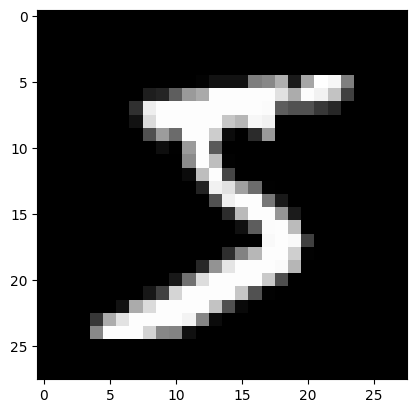

In [4]:
plt.imshow(training_data[0][0][0], cmap='gray')

Put the training and testing data into DataLoaders. Use a batch size of 100 for both sets, and shuffle the training data, but not the test data.

In [5]:
BATCH_SIZE = 100
train_loader = DataLoader(training_data, shuffle=True, batch_size=BATCH_SIZE)
test_loader = DataLoader(test_data, shuffle=False, batch_size=BATCH_SIZE)

# Constructing the Model

Now that the data is loaded, the next step is to construct the model. Create a method that uses the module subclass method to construct a network with two convolution layers and two fully connected layers and returns the constructed model. The function `nn.Conv2d()` is used to create the convolution layers. The important arguments are

1. `in_channels` -- number of input feature maps
2. `out_channels` -- number of output feature maps
3. `kernel_size`
4. `stride`
5. `padding`

The parameters `kernel_size`, `stride`, and `padding` can either be:
* a single int – in which case the same value is used for the height and width dimension
* a tuple of two ints – in which case, the first int is used for the height dimension, and the second int for the width dimension

The network should have the following components:
1. Convolution with 32 feature maps, 3x3 kernel, stride of 1 and no padding.
2. ReLU activation.
3. Convolution with 64 feature maps, 3x3 kernel, stride of 1 and no padding.
4. ReLU activation.
5. Max pooling layer using `F.max_pool2d(x, 2)`.
6. Dropout with activation probability of 0.25.
7. Convert to vector with `torch.flatten(x,1)`
8. Fully connected layer with 128 neurons, using `nn.Linear`.
9. ReLU activation.
10. Dropout with activation probability of 0.5.
11. Fully connected layer with 10 neurons, using `nn.Linear`.

In [6]:
# Define the CNN model
class cnn_model(nn.Module):
    def __init__(self):
        super(cnn_model, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout2d(0.25)
        self.dropout2 = nn.Dropout2d(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        #output = F.log_softmax(x, dim=1)
        output = x
        return output

Use the method you just created to construct a model.

In [7]:
model = cnn_model()

After constructing the model, print a summary.

In [8]:
print(model)

cnn_model(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (dropout1): Dropout2d(p=0.25, inplace=False)
  (dropout2): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=9216, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


# Training the Network

The first step in training the network is to select the optimizer. Use `Adam` as the training function.

In [9]:
optimizer = torch.optim.Adam(model.parameters())

Assign the loss function as `nn.CrossEntropyLoss()`.

In [10]:
loss_fn = nn.CrossEntropyLoss()

Write a training loop. First, use a GPU if one is available. Train for 10 epochs, using the train_loader created above. Every 100 iterations, print out the training loss for the current minibatch, and save the loss for later plotting.

In [11]:
# Training loop
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

total_loss =  []
ind =  []
for epoch in range(10):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        data = data.to(device)
        target = target.to(device)
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            total_loss.append(loss.item())
            ind.append(batch_idx + epoch*len(train_loader)/BATCH_SIZE)
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))


/usr/local/lib/python3.12/dist-packages/torch/nn/functional.py:1374: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Train Epoch: 0 [0/60000 (0%)]	Loss: 2.307949
Train Epoch: 0 [10000/60000 (17%)]	Loss: 0.363031
Train Epoch: 0 [20000/60000 (33%)]	Loss: 0.251211
Train Epoch: 0 [30000/60000 (50%)]	Loss: 0.207219
Train Epoch: 0 [40000/60000 (67%)]	Loss: 0.151421
Train Epoch: 0 [50000/60000 (83%)]	Loss: 0.111025
Train Epoch: 1 [0/60000 (0%)]	Loss: 0.100322
Train Epoch: 1 [10000/60000 (17%)]	Loss: 0.148060
Train Epoch: 1 [20000/60000 (33%)]	Loss: 0.079151
Train Epoch: 1 [30000/60000 (50%)]	Loss: 0.062324
Train Epoch: 1 [40000/60000 (67%)]	Loss: 0.060404
Train Epoch: 1 [50000/60000 (83%)]	Loss: 0.054486
Train Epoch: 2 [0/60000 (0%)]	Loss: 0.066939
Train Epoch: 2 [10000/60000 (17%)]	Loss: 0.116727
Train Epoch: 2 [20000/60000 (33%)]	Loss: 0.083928
Train Epoch: 2 [30000/60000 (50%)]	Loss: 0.107067
Train Epoch: 2 [40000/60000 (67%)]	Loss: 0.022297
Train Epoch: 2 [50000/60000 (83%)]	Loss: 0.050168
Train Epoch: 3 [0/60000 (0%)]	Loss: 0.075155
Train Epoch: 3 [10000/60000 (17%)]	Loss: 0.064194
Train Epoch: 3 [2000

Plot the loss that you saved in the training loop.

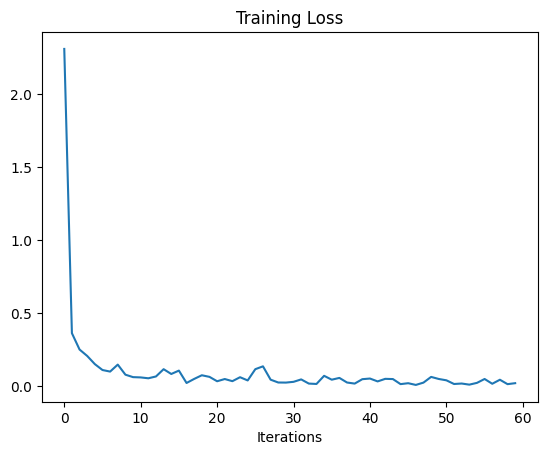

In [12]:
plt.plot(total_loss)
plt.title('Training Loss')
plt.xlabel('Iterations')
plt.show()

# Evaluate the Trained Model

In a loop of minibatches, using the test_loader, compute the overall accuracy of the network on the test set.

In [13]:
# Testing loop
correct = 0
with torch.no_grad():
    for data, target in test_loader:
        output = model(data.to(device))
        pred = output.argmax(dim=1, keepdim=True).cpu()
        correct += pred.eq(target.view_as(pred)).sum().item()

print('\nTest set: Accuracy: {}/{} ({:.0f}%)\n'.format(
    correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))


Test set: Accuracy: 9807/10000 (98%)



To get some insight into what the network has learned, plot the kernels of the 32 feature maps in the first layer of the network. You can get the weights of that layer uisng `model1.conv1.weight.data.cpu().numpy()`.

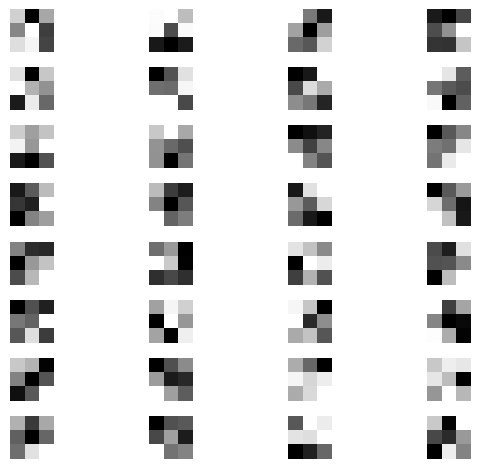

In [14]:
# Access the first convolutional layer
first_conv_layer = model.conv1

# Get the weights of the layer
weights = first_conv_layer.weight.data.cpu().numpy()

# Visualize the kernels
fig, axes = plt.subplots(nrows=8, ncols=4)
for i in range(32):
    ax = axes[i // 4, i % 4]
    ax.imshow(weights[i, 0], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

Do these kernels give you any insight into how the network is identifying the different numerals?

Another way to understand the operation of the network is to look at the output of the feature maps for a specific input. In the next code block, select a single image from the test loader and apply it to the network. Then plot the outputs of the 32 feature maps in the first layer. You can access the outputs of the feature maps using `model1.conv1(image).cpu()`.

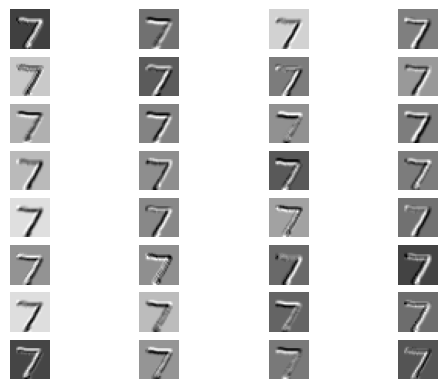

In [15]:
# Get the output of the first convolutional layer
first_batch = next(iter(test_loader))
image = first_batch[0][0].to(device)
output = model.conv1(image).cpu()

# Visualize feature maps
for i in range(output.shape[0]):
    plt.subplot(8, 4, i+1)  # Adjust grid size as needed
    plt.imshow(output[i].detach().numpy(), cmap='gray')
    plt.axis('off')

plt.show()

After the model is trained to your satisfaction, save the model so that it can be used in the second lab. It is possible to save the entire model, but it is recommended to save just the model’s learned parameters, which are stored in `model.state_dict()`. This can be done with `torch.save(model.state_dict(), PATH)`.

To load the model later, you need to first create an instance of the model, for example, by using `model = cnn_model()`. Then you can load the parameters using `model.load_state_dict(torch.load(PATH, weights_only=True))`.

In the next cell, save the model. We will load the model back in the second PyTorch lab.

In [16]:
path = os.getcwd()
os.makedirs('../Model' , exist_ok=True)
#data_path = '/media/martin/Storage/github/DeepLearning/10.PyTorchIntroChapter/Code/data/'
model_path = '../Model/'
torch.save(model.state_dict(), model_path + 'cnn_model_state.pt')

## Explore Further

Experiment with different network architectures. Try to find the architecture that gives you the best accuracy. Investigate the following.

1. Increase the size of the convolution kernels, and display the kernels. Do the shapes of the kernels become more intuitive?
1. Increase the number of feature maps in the convolution layers. Does the testing accuracy increase?
1. What if you add another convolution layer? Do you get better results increasing the number of neurons in each layer, or the number of layers (assuming the overal number of weights stays the same)?
1. Try using batch normalization and removing the dropout. How does the test accuracy change?
1. How small can you make the network and still achieve 98% test accuracy.
1. Train with and without the GPU. How much speedup, if any, does the GPU give you?